### 목표
- 손글씨 데이터를 분류하는 딥러닝 모델 설계
- label : 0,1,2,3,4,5,6,7,8,9 -> 총 10ea의 class


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # 손글씨 데이터 셋

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

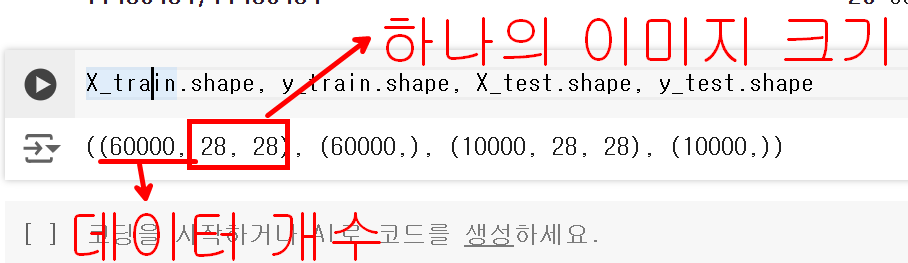

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

<function matplotlib.pyplot.show(close=None, block=None)>

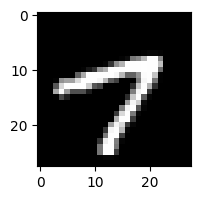

In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(X_train[101], cmap = "gray")
plt.show
# 하나의 픽셀 당 0~255 -> 0 : 검정색, 255 : 흰색

In [ ]:
y_train[101]

7

### MLP 모델링

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Flatten
# Flatten : 다차원의 데이터를 1차원의 형태로 변환하는 층 -> Dense층은 입력을 1차원 형태로만 받음!

In [ ]:
# 1. 신경망 구조 설계

# 뼈대
model2 = Sequential()

# 입력층
model2.add(InputLayer(shape = (28, 28)))
model2.add(Flatten()) # 1차원 형태로 변환

# 간층
model2.add(Dense(units = 32, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dense(units = 256, activation = "relu"))
model2.add(Dense(units = 128, activation = "relu"))
model2.add(Dense(units = 64, activation = "relu"))
model2.add(Dense(units = 32, activation = "relu"))
# 출력층
model2.add(Dense(units = 10, activation = "softmax"))
# 다중분류 -> 유닛의 수는 클래스만큼!, activation은 softmax 고정!

In [ ]:
# 2. 학습 방법 설정
model2.compile(
    loss = "sparse_categorical_crossentropy", # 다중 분류의 loss func
    # "categorical_crossentropy"도 있음 -> y데이터의 컬럼 개수가 클래스의 개수만큼 존재해야 함!
    metrics = ["accuracy"],
    optimizer = "adam")

In [ ]:
# 3. 학습
model2.fit(X_train, y_train,
              validation_data = (X_test, y_test), # val_accuracy에 사용될 데이터셋
              callbacks = [model_checkpoint_callback, early_stop_callback],
              epochs = 50)

Epoch 1/50
1865/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7732 - loss: 0.7749
Epoch 1: val_accuracy improved from -inf to 0.93300, saving model to ./data/handmodel-001-0.9330.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7738 - loss: 0.7730 - val_accuracy: 0.9330 - val_loss: 0.2468
Epoch 2/50
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9401 - loss: 0.2163
Epoch 2: val_accuracy improved from 0.93300 to 0.94950, saving model to ./data/handmodel-002-0.9495.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9401 - loss: 0.2163 - val_accuracy: 0.9495 - val_loss: 0.1920
Epoch 3/50
1862/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9535 - loss: 0.1677
Epoch 3: val_accuracy improved from 0.94950 to 0.94990, saving model to ./data/handmodel-003-0.9499.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9535 - loss: 0.1677 - val_accuracy: 0.9499 - val_loss: 0.2034
Epoch 4/50
1861/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accurac

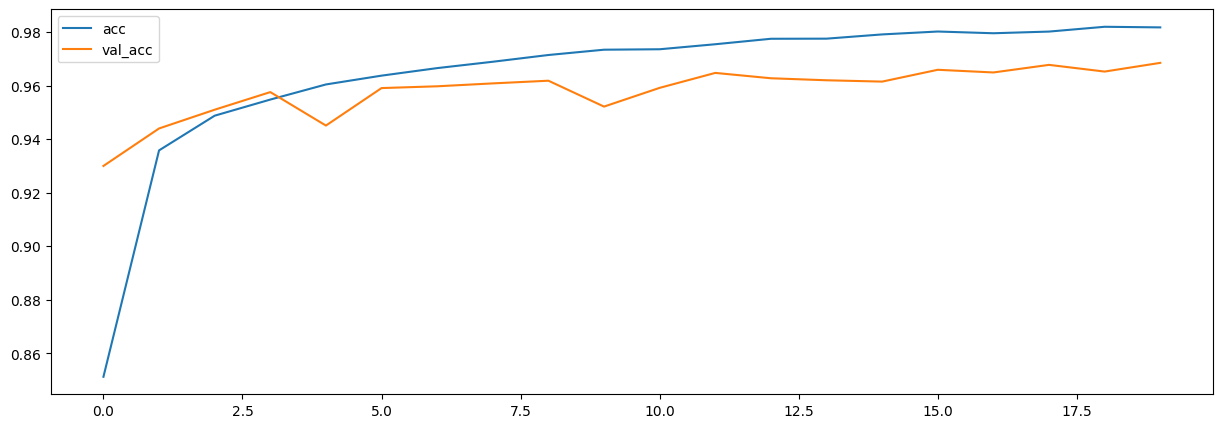

In [ ]:
# 4. 평가
plt.figure(figsize = (15,5))
plt.plot(h.history["accuracy"], label = "acc")
plt.plot(h.history["val_accuracy"], label = "val_acc")
plt.legend()
plt.show()

#### callback 함수
- 지정 된 epochs를 다 끝낼 경우 과대적합이 생길 수도 있음
- 학습 도중에 모델을 저장 -> ModelCheckpoint (모델 중간저장)
- 조기 학습 중단 -> EarlyStopping

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [ ]:
!pwd

/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)


In [ ]:
# 모델 저장
model.save("./data/hand_model.keras") # 옛날꺼 확장자 : hdf5, h5

In [ ]:
# 모델 불러오기
from tensorflow.keras.models import load_model # 모델 불러오는 도구
loaded_model = load_model("./data/hand_model.keras")

In [ ]:
loaded_model

<Sequential name=sequential_1, built=True>

In [ ]:
# 불러온 모델 예측 수행해보기!
loaded_model.predict(X_test)[0].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


7

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  84, 185, 159, 151,  60,  36,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 222, 254, 254, 254, 254, 241, 198,
        198, 198, 198, 198, 198, 198, 198, 170,  52,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  67, 114,  72, 114, 163, 227, 254,
        225, 254, 254, 254, 250, 229, 254, 254, 140,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  17,  66,
         14,  67,  67,  67,  59,  21, 236, 254, 106,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,  83, 253, 209,  18,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  22, 233, 255,  83,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 129, 254, 238,  44,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  59, 249, 254,  62,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0, 133, 254, 187,   5,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   9, 205, 248,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 126, 254, 182,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  75, 251, 240,  57,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         19, 221, 254, 166,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
        203, 254, 219,  35,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,
        254, 254,  77,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 224,
        254, 115,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 133, 254,
        254,  52,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [ ]:
# callback 사용해보기!
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
# 저장할 모델의 파일명과 경로 지정
model_path = "./data/handmodel-{epoch:03d}-{val_accuracy:.4f}.keras"
# 03d -> 10진수 3자리로 표현
# .4f -> 소수점 4자리까지 표현

In [ ]:
# 전보다 나은 성능을 보이면 저장
model_checkpoint_callback = ModelCheckpoint(
    filepath = model_path,
    monitor = "val_accuracy", # 검증 정확도를 기준
    save_best_only = True, # 나아진 모델만 저장
    verbose = 1 # 저장할 때 출력
)

In [ ]:
early_stop_callback = EarlyStopping(
    monitor = "val_accuracy",
    patience = 5 # 학습 중단을 위한 조건, monitor(검증 정확도)를 기준으로 5번의 에포크 동안 성능이 향상되지 않으면 조기 중단!
)

In [ ]:
# 학습결과가 좋은 모델 불러오기
loaded_model2 = load_model("/content/drive/MyDrive/Colab Notebooks/인사교_머신러닝/DL (딥러닝)/data/handmodel-010-0.9701.keras")

In [ ]:
loaded_model2.predict(X_test)[9000].argmax()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


7

In [ ]:
y_test[9000]

7

- model 성능 직접 확인해보자!

In [ ]:
import PIL.Image as pimg #사진 파일 다루는 라이브러리
img = pimg.open("./data/내가 만든 손글씨.gif")

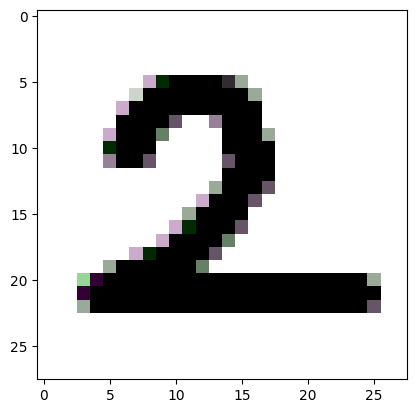

In [ ]:
plt.imshow(img)
plt.show()

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [ ]:
img = np.array(img) # 다루기 쉽게 ndarray 형변환

In [ ]:
img

array([[251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 196,   6,   0,   0,   0,
          0,  49, 153, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 202,   0,   0,   0,   0,   0,
          0,   0,   0, 153, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 196,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251,   0,   0,   0,   0,  98, 251, 251,
        147,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 196,   0,   0,   0, 104, 251, 251, 251,
        251,   0,   0,   0, 153, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251,   6,   0,   0,   0, 251, 251, 251, 251,
        251,   0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 147,   0,   0,  98, 251, 251, 251, 251,
        251,  98,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251,   0,   0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        153,   0,   0,   0,  98, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 196,
          0,   0,   0,  98, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 153,   0,
          0,   0,   0, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 196,   6,   0,
          0,   0,  98, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 196,   0,   0,   0,
          0, 104, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 196,   6,   0,   0,   0,   0,
         98, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 153,   0,   0,   0,   0,   0,   0, 104,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 159,  43,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 153,
        251, 251],
       [251, 251, 251,  43,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        251, 251],
       [251, 251, 251, 153,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  98,
        251, 251],
       [251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251, 251,
        251, 251],
       [251, 251, 251, 251, 251, 251, 25

In [ ]:
img[0, 0]

251

In [ ]:
num = 255 - img # 색상 반전

In [ ]:
num = num.reshape(1, 28, 28) # 차원 수정

In [ ]:
# 실제로 예측해보자!
loaded_model2.predict(num).argmax()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


2

#### MLP 이미지 분석의 한계
- 모든 픽셀값을 활용하여 연산을 수행
- 이미지 픽셀의 위치 정보까지 반영하여 학습 -> 위치에 종속
- 이미지의 형태가 같더라도, 이미지 크기/위치/색상 등의 정보가 달라지면 패턴이 다르다고 판단 -> 예측이 잘 안됨/..
- MLP로 올바른 예측을 수행하기 위해서는, 학습했던 손글씨 이미지들의 크기/위치/색상 등이 비슷해야 예측이 가능                                                                                                                                                                                                                                                                                                                                                                                                                             